$\Huge{\text{Física Computacional}}$

# Tema 7: Ecuaciones Diferenciales Ordinarias.

- Las ecuaciones diferenciales son el problema en física para el cual el uso de ordenadores es más común.
- En este tema nos centraremos en las ecuaciones diferenciales ordinarias. 
- Las ecuaciones en derivadas parciales serán analizadas en el Tema 8. 


## 7.1 Ecuaciones diferenciales de primer orden en una variable.

- Son aquellas que sólo tienen una variable independiente, que de forma general asignaremos al tiempo $t$.
- Por ejemplo la ecuación:

$$\frac{dx}{dt}=\frac{2x}{t}.$$

$\quad$ es una ecuación diferencial de primer orden.

- Sin embargo, mientras que esta ecuación se puede resolver de forma analítica porque es separable, la ecuación:

$$\frac{dx}{dt}=\frac{2x}{t}+\frac{x^2}{t^3},$$

$\quad$ es no separable y encima no lineal, lo que de forma general hace que este tipo de ecuaciones no sean resolubles analiticamente.

- Estas son por tanto el tipo de ecuaciones diferenciales que sólo podemos resolver numericamente en un ordenador, que de forma general expresamos como:

$$\frac{dx}{dt}=f(x,t),$$

$\quad$ donde $f(x,t)$, la función dada, dependerá de forma general de $x$, la variable dependiente, y de $t$, la variable independiente.

- La solución de las ecuaciones diferenciales requiere por supuesto fijar las concidiones iniciales/contorno, que por lo general asumiremos dada.

### 7.1.1 El método de Euler. 

- Es el método más sencillo e intuitivo, pero se usa muy raramente pues el método de Runge-Kutta es casi igual de sencillo y rápido, pero más preciso.


- La idea es, una vez más, usar una serie de Taylor; si queremos saber el valor de $x$ en un tiempo $t+h$ hacemos:

$$x(t+h)=x(t)+h\frac{dx}{dt}+\frac{1}{2}h^2\frac{d^2x}{dt^2}+\cdots=x(t)+h f(x,t)+{\cal O}(h)^2.$$

- Sabiendo el valor de $x$ para un tiempo $t$ esta ecuación nos permite calcular el valor de x un tiempo $x+h$ después. 

- Partiendo por tanto de nuestra condición inicial o de frontera, podemos iterar esta ecuación para obtener $x$ en un conjunto de puntos equiespaciados por una distancia $h$.

- Si el valor de nuestro paso, $h$, es suficientemente pequeño, esto nos permitirá obtener una buena descripción de nuestra solución. 

**Ejercicio 7.1: El método de Euler**

Aplicar el método de Euler para resolver la ecuación:

$$\frac{\text{d}x}{\text{d}t}=-x^3+\sin t,$$

en el intervalo $[0,10]$ usando 1000 puntos equiespaciados con la condición incial $x(t=0)=0$. 

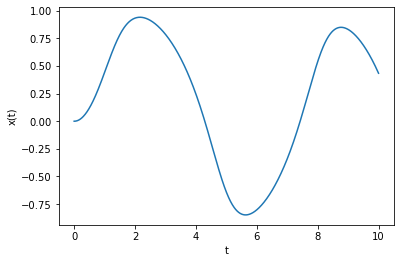

In [2]:
from numpy import linspace,sin
from matplotlib.pyplot import plot,xlabel,ylabel,show

# definimos nuestra función

def f(x,t):
    return -x**3+sin(t)

# Constantes y parámetros del problema

a=0               # comienzo del intervalo
b=10              # final del intervalo
N=1000            # número de pasos
h=(b-a)/N         # paso
x=0               # condición incial

tp=linspace(a,b,N)
xp=[]

for t in tp:    
    xp.append(x)
    x+=h*f(x,t)
    
plot(tp,xp)    
xlabel("t")
ylabel("x(t)")
show()

#### Error del método de Euler.

- El error en el método de Euler queda patente a partir del desarrollo en serie de Taylor que hemos utilizado a la hora de construir la solución.

- El error introducido en el paso incial $t+h$ es:

$$\Delta x(t+h)=\frac{1}{2}h^2\frac{\text{d}^2 x}{\text{d}\,t^2}.$$

- A primera vista podría parecer que es un error de segundo orden es decir, proporcional a $h^2$, 
  sin embargo, es sólo el error asociado a un paso.
  
- Partiendo de un punto inicial $t=a$ el error en el punto final del intervalo t=b, des pués de haber recorrido $N=(b-a)/h$ pasos de longitud $h$.  
  el error acumulado en nuestra solución vendrá dado por la suma de los errores individuales de cada paso:

$$\sum_{k=0}^{N-1}\frac{1}{2}h^2\left(\frac{\text{d}^2x}{\text{d}t^2}\right)_{t=t_k}=\frac{1}{2}h\sum_{k=0}^{N-1}h\left(\frac{\text{d} f(x,t)}{\text{d}t}\right)_{t=t_k}\simeq \frac{1}{2}h\int\limits_{a}^b \frac{\text{d}f(x,t)}{\text{d}t}\text{d}t=\frac{1}{2}h\left(f(x(b),b)-f(x(a),a)\right),$$

$\quad$ donde hemos aproximado la suma por una integral, lo cual es una buena aproximación si $h$ es pequeño.

- Aunque el error de cada paso es ${\cal O}(h^2)$, el error final es lineal en $h$: para reducir el error por dos tenemos que duplicar el número de pasos.

**Final de la clase del 17/11/21**